## Partial Differential Equations, PDE

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad,odeint
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

### 9.1 Background

Many important phenomena in chemistry, physics, and biology involve partial differential equations; for example, the Schroedinger, wave, and diffusion equations. Although the general theory of partial differential equations is well beyond the scope of this book, the equations mentioned are among those whose solutions can be obtained by a powerful method known as the separation of variables.

The simplest type of partial differential equation has two independent variables, $x$ and $y$, and its solution must represent a surface rather than a curve as does that of an ordinary differential equation. The ordinary differential equation has arbitrary constants as a result of integration, which are determined by the initial or boundary conditions; the partial differential equation has instead _arbitrary functions_ of integration and these have to be eliminated to obtain a particular solution. The problem is not that there are too few arbitrary functions to solve the equation but that there are too many. An example given by Stephenson (1996) illustrates this point. 

Consider the equation formed by differentiating $w = yf(x)$ with respect to $y$, and where $f(x)$ is a general, unspecified function of $x$. The differential is $\displaystyle \frac{\partial w}{\partial y} = f(x)$ and by substitution to eliminate $f(x)$ the partial differential equation is

$$\displaystyle y\frac{\partial w}{\partial y}-w=0$$

which is a first-order equation. The solution to this is $f(x)$ but as this function was not specified, it is therefore _any arbitrary function_. Exactly what this function might be has to be determined by using the initial or boundary conditions imposed on the problem.

As a second example, the one-dimensional wave equation will be 'solved'. This equation has the form 

$$\displaystyle \frac{\partial^2u}{\partial t^2}=a^2\frac{\partial^2u}{\partial x^2}$$

Consider now the equation

$$\displaystyle u=f_1(x+at)+f_2(x-at)$$

where the functions $f$ are arbitrary and are not defined in any real sense. To find a solution we differentiate twice by $x$ then twice by $t$ and add the results. Let $x + at \equiv r$ and $x − at \equiv s$, then

$$\displaystyle \frac{\partial u}{\partial x}=\frac{\partial (f_1+f_2)}{\partial r}\frac{\partial r}{\partial x}+\frac{\partial (f_1+f_2)}{\partial s}\frac{\partial s}{\partial x} =f'(x+at)+f'_2(x-at)$$

and similarly 

$$\displaystyle \frac{\partial^2u}{\partial x^2}=f''_1(x+at)+f''(x-at) ; \qquad \frac{\partial^2u}{\partial t^2}=a^2f''_1(x+at)+a^2f''(x-at)$$

and adding these two equations and eliminating the functions produces the wave equation 

$$\displaystyle \frac{\partial^2u}{\partial t^2}=a^2\frac{\partial^2u}{\partial x^2}$$ 

To convince yourself of the arbitrary, and hence not very useful nature of the functions $f_1$ and $f_2$ that solve the wave equation, use Sympy to do the algebra on a few functions with arguments $x \pm at$. The functions (see box below) are differentiated twice in $t$ and $x$ and then the wave equation is formed and the result is zero, proving that the functions we choose are in fact solutions. This method is therefore a way of solving the equation, but in many cases, the method of separating variables is more satisfactory and is described next.

In [2]:
x,a,t =symbols(' x a t')
f = sin(exp(x+a*t)) + exp(sin(x-a*t))       # an arbitrary function in x+at, x-at
ans = diff(f,t,t) - a**2*diff(f,x,x)
ans

In [3]:
f= (x+a*t)**3 + 1/(x-a*t)**2  + (x-a*t)*sin(x-a*t) # another  arbitrary function in x+at, x-at
ans = simplify(diff(f,t,t) - a**2*diff(f,x,x)) 
ans

### 9.2 Separation of variables

This method assumes that the solution to the partial differential equation is based on splitting the problem into two parts. In the diffusion equation the quantity required is usually the concentration of a species as a function of time and of position. The solution is therefore found using $c(x,t) = c(x)c(t)$ and splitting the partial differential equation into two parts, one, which depends on time alone and the other on position alone. Both these equations are then made equal to a constant and each can be solved. To find the constants introduced by integration, and thus the exact form of the solution, the initial and boundary conditions are now used. Finding these constants often, but not always, involves expanding the solution as a Fourier series. Solving the differential equations is often the simpler part of the calculation; handing the boundary conditions can involve more work. Some examples are now given.

#### (i) Particle in a two-dimensional box

The energy and wavefunctions of a particle in a two-dimensional box with sides of length $a$ and $b$ are calculated from the Schroedinger equation

$$\displaystyle -\frac{\hbar^2}{2m}\left(\frac{\partial^2 \varphi }{\partial x^2 }  +\frac{\partial ^2\varphi}{\partial y^2} \right) =E\varphi \tag{41} $$

which is a partial differential equation in $x$ and $y$. The separation of variables assumes that the wavefunction $\varphi$ which is a function of $x$ and $y$, is also the product of two wavefunctions, one in $x$ and the other in $y$, thus

$$\displaystyle \varphi(x,y) = \psi(x)\psi(y) \equiv \psi_x\psi_y$$

Substituting gives $\displaystyle -\frac{\hbar^2}{2m}\left(\psi_y\frac{\partial^2 \psi_x }{\partial x^2 }  +\psi_x\frac{\partial ^2\psi_y}{\partial y^2} \right) =E\psi_x\psi_y$

and rearranging $\displaystyle -\frac{\hbar^2}{2m}\left(\frac{1}{\psi_x}\frac{\partial^2 \psi_x }{\partial x^2 }  +\frac{1}{\psi_y}\frac{\partial ^2\psi_y}{\partial y^2} \right) =E$

The next step is essential to the method of separating variables and this is that each of the terms on the left of the equation must be equal to a constant. This is true because the two terms are variables of either $x$ or $y$. If $x$ is varied, only the first term of the equation changes, the other is a constant as is the energy $E$. However, for the whole equation to be satisfied, the derivative in $x$ must be equal to a constant, and this is labelled as $E_x$, and is called a separation constant;

$$\displaystyle \displaystyle -\frac{\hbar^2}{2m}\frac{1}{\psi_x}\frac{\partial^2 \psi_x }{\partial x^2 }=E_x  \tag{42}$$

Similarly for changes in $y$, with $x$ constant,

$$\displaystyle \displaystyle -\frac{\hbar^2}{2m}\frac{1}{\psi_y}\frac{\partial^2 \psi_y }{\partial y^2 }=E_y  \tag{43}$$

and then 

$$\displaystyle  E_x + E_y = E  \tag{44}$$

The two equations in $x$ and $y$ can now be solved in the usual way. For example $\displaystyle \frac{\partial^2 \psi_x}{\partial x^2}+k^2\psi_x=0$ with $\displaystyle k^2 = 2mE/\hbar^2$ which produces the solutions to the problem of a particle in a one-dimensional box, see 3.8. Combining the equations gives for a box of dimensions $a$ and $b$,

$$\displaystyle \varphi =\sqrt{\frac{4}{ab}}\sin\left( \frac{n_x\pi x}{a}\right)\sin\left(\frac{n_y\pi x}{b} \right)$$

and the energies are $\displaystyle E=\frac{\pi^2\hbar^2}{2m}\left(\frac{n_x^2}{a^2}+\frac{n_y^2}{b^2}  \right) $ where $n_x$ and $n_y$ are positive integer quantum numbers which must be greater than zero, viz, $n_{x,y} = 1, 2, 3 \cdots$. Notice that in a square box some levels will be degenerate depending upon how the quantum numbers add, for example, $n_x = 2$ and $n_y = 1$ and vice versa. The first few wavefunctions are shown as contour plots in Fig. 20.

![Drawing](diffeqn-fig20.png)

Fig. 20 Wavefunctions in the square well drawn as contour plots. The quantum numbers are labelled above each plot. Negative values are drawn as dashed lines.
_____

#### (ii) Particle in a  circular well

The pattern of nodes of the radial part of a wavefunction of a particle in a deep circular well is described by a Bessel function. The properties of these functions are well established and look like damped sine and cosine waves. The pattern of vibrations on a circular drum head is similar.

There are two boundary conditions. One ensures that the angular solutions repeat themselves around the circumference and the gradients match at the same point, just as for a particle on a ring. The other ensures that the radial part of the wavefunction is zero at the edge of the disc, just as is the case for a particle in a box at its edges.
The wave equation starts out as (41) but for a disc has to be written in plane polar coordinates to be solvable and is

$$\displaystyle -\frac{\hbar^2}{2m}\left( \frac{\partial^2}{\partial r^2}+ \frac{1}{r}\frac{\partial^2}{\partial r^2}+\frac{1}{r^2}\frac{\partial^2}{\partial \theta^2} \right)\psi+V(r)\psi=E\psi  \tag{45} $$

and the potential energy $V$ is zero and $\psi $ is a function of $r$ and $\theta$. The disc has a radius of $a$. (See Section 5.9 for the conversion equations to polar coordinates.) With the abbreviation $k^2 = 2mE/\hbar^2$ (units of $k$ are m$^{-1}$) the equation can be rewritten as

$$\displaystyle \left( \frac{\partial^2}{\partial r^2}+ \frac{1}{r}\frac{\partial^2}{\partial r^2}+\frac{1}{r^2}\frac{\partial^2}{\partial \theta^2} \right)\psi+k^2\psi = 0  \tag{46}$$

Separating variables into $r$ and $\theta$ _assumes_ that the solution has the form $\psi = R(r)\varphi(\theta)$. Substituting for $\psi$, then dividing by $R\varphi$ and multiplying by $r^2$ gives

$$\displaystyle  \frac{r^2}{R}\frac{\partial^2}{\partial R^2}+ \frac{r}{R}\frac{\partial^2R}{\partial r^2}+\frac{1}{\varphi}\frac{\partial^2\varphi}{\partial \theta^2} +r^2\psi=0  \tag{46}$$

and each term must be equal to a constant and is therefore independent of $r$ and $\theta$. The right-hand side of this equation is zero hence if we choose the separation constant to be $n^2$ this is $-n^2$ for one equation and $+n^2$ for the other. 

#### Angular solution

The $\theta$ equation is $\displaystyle \frac{1}{\varphi}\frac{\partial^2\varphi}{\partial \theta^2}=const$ and using the separation constant $-n^2$ this can be written as

$$\displaystyle  \frac{\partial^2\varphi}{\partial \theta^2}+n^2\varphi = 0  \tag{47}$$

and its solution is given by equation (27) and is 

$$\displaystyle \varphi=\frac{1}{\sqrt{2\pi}}e^{\large{in\theta}}$$ 

#### Radial solution

The angular boundary conditions make the wavefunction $\varphi$ repeat itself after each $2\pi $n radians where $n$ has values $n = 0,  \pm 1, \pm 2, \cdots$.

The radial equation 

$$\displaystyle  \frac{r^2}{R}\frac{\partial^2}{\partial R^2}+ \frac{r}{R}\frac{\partial^2R}{\partial r^2} +r^2k^2=n^2  \tag{48}$$

is more difficult to solve but, with the substitution $x = kr$, has the form of Bessel's equation,

$$\displaystyle  x^2\frac{d^2R}{dx^2}+x\frac{dR}{dx}+(x^2-n^2)R=0$$

which has the solution $J_n(x)$ where $J$ is Bessel's function of the first kind of order $n$. All Bessel's functions are described by an infinite series in $x$ just as sine and cosine are. See Margenau & Murphy (1943), Abramowicz & Stegun (1965), or Arkfen (1970), for the series. 

The solution is 

$$\displaystyle R(r) = C_0\text{BesselJ}(n,r)+C_1\text{BesselY}(n,r) $$

and the constants will be determined by the boundary conditions. 

The radial boundary condition is that the wavefunction is zero at the edge of the disc, which means that the Bessel function has to be zero here. Additionally the wavefunction has to be normalized. This latter requirement means that the second constant $C_1$ has to be zero because the second Bessel function BesselY is $-\infty$ at $r = 0$ and a wavefunction based on this function could not be normalised. We can arbitrarily set $C_0$ to $N$, which we will assume normalizes the wavefunction, and the radial solution is therefore

$$\displaystyle R(r)=NJ_n(kr)$$

with the change $J\to BesselJ$. The radial boundary condition means that $J_n(ka) = 0$ for a disc of radius $a$. The Bessel function is repeatedly zero, as are sine and cosine, which it resembles, and $\rho_{n,l} = k_{n,l}a$ is the number where the $n^{th}$ Bessel function $J_n(k_{nl}r)$ crosses zero for the $l^{th}$ time. The wavefunction is

$$\displaystyle  R(r)=NJ_n\left(\rho_{n,l}\frac{r}{a} \right) $$

The values of $\rho_{nl}$ can be calculated using SciPy 'special' functions via. $\mathtt{import scipy.special as sp}$ and then $\mathtt{sp.jn( n, x )}$ and the zeros as $\mathtt{sp.jn_zeros( n, num_0 )}$. 

The shape of the wavefunction at a fixed angle $\theta$ has the profile of the Bessel function with the radius set at each of the zero crossings, the lowest energy is found at the first crossing, $\rho_{0,1}$ the next at crossing $\rho_{1,1}$ and so on with increasing $r$, see Fig. 21. The wavefunction for the lowest state ($k = 0,\, l = 1$) does not have a node before reaching the perimeter, the second ($k = 1,\, l = 1$) has one node as so on, just as for the particle in a box. 

Using the definition of $k^2$ the energy is $\displaystyle E_{n,l}=\frac{\hbar^2}{2m}\left( \frac{\rho_{n,l}}{a} \right)^2$ and the energy of the first few energy levels follows that of the value of $\rho_{n,l}$. Notice how this pattern of levels is similar, but not identical, to that of a particle in a box. The energy levels are ordered with the quantum numbers, $n$ and $l$, but in this case act through the value $\rho$, and this is different to that of the square well or box where the quantum numbers are included directly in the energy.

![Drawing](diffeqn-fig21.png) ![Drawing](diffeqn-fig21a.png)

Fig 21. Left. Bessel's $J$ functions plotted with $x=kr$. Two of the zeros $\rho_{0,1}$ and $ \rho_{3,1}$ are marked with black dots. Right. The first few energy levels of a particle on a disc are shown for a disc of $1$ nm radius with mass that of the electron. The quantum numbers $n$, and $l$ are shown also.
____
Some of the zero values of $\rho$ are given in the table. This list also shows the ordering of the energy levels.

$$\displaystyle \begin{array}{c|cc}
\hline
n & 0 & 1 & 2 & 0 & 3& 1\\
l & 1 & 1 & 1 & 2 & 1 & 2\\
\rho_{n,l} & 2.40 & 3.83 & 5.13 & 5.52 & 6.38 & 7.01\\
\hline\end{array}$$

The total wavefunction is

$$\displaystyle \psi_{n,l}=\frac{N}{\sqrt{2\pi}} J_n\left( \frac{\rho_{n,l} r}{a} \right) e^{ni\theta}$$

and as $n$ can take values $0, \pm 1, \pm$ 2, etc. and all levels except the first are doubly degenerate. We can think of this, if you wish, as the particle moving in a clockwise or anti-clockwise manner although such everyday notions are always problematic when quantum effects are concerned and so should not be taken too literally. The quantum number $l$ has positive integer values $\gt$ 0.

#### Drums

Equation (46), if slightly modified, describes the shape of the normal modes of a circular drum, and the corresponding equations for a square box those of a square drum. The change to make is $\displaystyle k^2 = \omega^2/c^2$ where $c^2 = \sqrt{T/\sigma}$ and $\omega$ is the normal mode's vibrational frequency in rad $s^{-1}$. If the drum skin were cut, a tension of $T$ newton per metre would be needed to keep it closed. The density of the drum skin $\rho$ (units of kg m$^{-2}$) gives $c$ units of velocity. The normal mode frequencies are $\displaystyle \omega_{n,l} = \frac{\rho_{n,l}c}{a}$ and because the overtones are never an integer multiple of the fundamental, because of the values $\rho$ takes (see table), a drum makes a noise rather than a pure sound.


#### (iii) Steady State temperature profile in two dimensions

The Laplace equation 

$$\displaystyle \frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}+\frac{\partial^2 V}{\partial z^2} = 0$$

finds application in areas as diverse as steady state heat flow and electrostatics. This equation is so important that it is often abbreviated to 

$$\displaystyle \nabla^2 V = 0$$

with the symbol $\nabla $, which is nabla, is often called 'del' squared. 

In two dimensions,$\displaystyle \frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}=0$ and the solution can be obtained in a similar manner to the last example. Separating variables produces

$$\displaystyle \frac{1}{V_x}\frac{\partial^2 V_x}{\partial x^2}+\frac{1}{V_y}\frac{\partial^2 V_y}{\partial y^2}=0$$

but each derivative must now be equal to the same constant as their sum is zero. Thus, $\displaystyle \frac{1}{V_x}\frac{\partial^2 V_x}{\partial x^2}=-\frac{1}{V_y}\frac{\partial^2 V_y}{\partial y^2}=k^2 $ and where $k^2$ is chosen to make the solutions simpler and $k^2 \ge 0$.  The general solutions to these
equations are

$$\displaystyle V_x=Ae^{+kx}+Be^{-kx} \qquad \text{and} \qquad V_y=C\sin(ky)+D\cos(ky)$$

and the final result is the product $V_xV_y$ with linear combinations of these solutions because the differential equation is linear and as such any linear combinations of solutions is also a solution. The next step is to find solutions that satisfy the initial or boundary conditions and these are defined by the problem being solved. 

As an example the temperature profile of a bar heated only at one end will be calculated. The bar has a width $L$ but a length that is so long as to be effectively infinite. The sides of the bar are kept at zero degrees and the end constantly heated to $T$ degrees; for generality, this temperature profile is called $f(y)$. The sketch, Fig. 10.22 shows the situation.

![Drawing](diffeqn-fig22.png)

Fig. 22 A bar with one end held at temperature $T$. The sides are held at 0<sup>o</sup>. The width of the bar is $L$.
____

The boundary conditions impose the constraints

$$\displaystyle \begin{array}{lccc}
y=0,\; V=0,& y=L,\; V=0\\
x=0,\; V=f(y),& x=\infty,\; V=0 \end{array}$$

The value $f(y)$ is any normal function that specifies how $V$ varies with position $y$. The four solutions are written without the integration constants because these are realized when the boundary conditions are applied and are

$$\displaystyle V=e^{+kx}\sin(ky)=e^{-kx}\sin(ky)=e^{+kx}\cos(ky)=e^{-kx}\cos(ky)  \tag{49}$$

When $x = \infty$, the solution cannot contain $\displaystyle e^{+kx}$ because the temperature is zero not infinity, so $\displaystyle e^{+kx} \sin(ky)$ and $\displaystyle e^{+kx} \cos(ky)$ are not solutions. At $y = 0$, the temperature is zero and so the solution cannot be $\displaystyle e^{-kx}\cos(ky)$ because $\cos(0)$ is not zero. This leaves the solution as 

$$\displaystyle V = e^{-kx}\sin(ky)$$

which leaves $k$ to be determined. When $y = L$ the temperature is zero and $\sin(kL) = 0$, which it will
be for all $k = n\pi/L$ if $n$ is an integer. Thus, the general solution is

$$\displaystyle V=e^{-n\pi x/L}\sin(n\pi y/L)$$

However, this does not satisfy the condition that at $x$ = 0 the temperature is some arbitrary but normal function $f(y)$ which could be some constant value, say $T$. To obtain a solution, a sum of all possible solutions is tried and this produces

$$\displaystyle V=\sum_{n=1}^{\infty} b_ne^{-n\pi x/L}\sin(n\pi y/L)  \tag{50}$$

as a _formal solution_ where $b_n$ are the amounts of each term to be included in the sum. When $x$ = 0 the temperature is $f(y)$, thus,

$$\displaystyle f(y)=\sum_{n=1}^{\infty} b_n\sin(n\pi y/L)$$

This relationship is a Fourier series of sines, therefore, we can find the coefficients $b_n$ as if they are Fourier coefficients (see Chapter 9.1.7) using

$$\displaystyle b_n=\frac{2}{L}\int_0^L f(y)\sin\left(\frac{n\pi y}{L} \right)dy  \tag{51}$$

If, for example, the temperature function $f(y) = T$ and $L = \pi$, then the coefficients are $\displaystyle b_n=\frac{}{}\int_0^\pi \sin(n y)dy$ , which evaluate to $\displaystyle \frac{4T}{\pi},\; \frac{4T}{3\pi},\;\frac{4T}{5\pi},\cdots$ and the temperature profile is 

$$\displaystyle V=\frac{4T}{\pi}\left(e^{-x}\sin(y)+ e^{-3x}\frac{\sin(3y)}{3}+e^{-5x}\frac{\sin(5y)}{5}+\cdots  \right) $$

The figure (fig 23) shows the temperature profile plotted as contours and python algorithm is listed also. The left-hand figure shows the calculation for a constant temperature $T = 10$ along the y-axis. In the right hand figure, the temperature varies as $10\sin^2(2\pi y/L)$ so it is initially maximal in two places  along the $y$ axis. The way the heat spreads out is intuitively consistent with this.

![Drawing](diffeqn-fig23.png)

Fig. 23 Steady state temperature contours with a temperature of zero along the top and bottom of a plate and $T$ = 10 (left) and $T=10\sin^2(2\pi y/L)$ held along the y-axis. The plate has a height of  $L$ = 3 and the temperatures decrease to the right as the temperature is held at zero infinite $x$.
_____

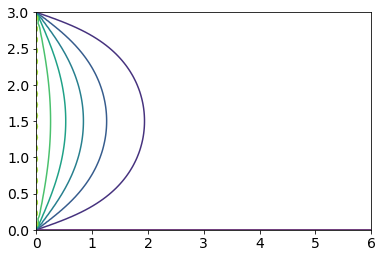

In [4]:
# this is the basic code to reproduce fig 23. Use quad() to numberically integrate
s = lambda y ,n : f(y)*np.sin(n*np.pi*y/L)
b = lambda n,y : 2*quad(s, 0, L, args = n)[0]  # use [0] to return only answer, nothing extra, from integration
V = lambda x, y,nmax : sum( [b(n,y)*np.exp(-n*np.pi*x/L)*np.sin(n*np.pi*y/L) for n in range(1,nmax)] )
L = 3
f = lambda y:  10.0
x =   np.linspace(0,2*L, 100)
y =   np.linspace(0,  L, 100)
X,Y = np.meshgrid(x,y)             # set up grid for contour plot
plt.contour(X, Y, V(X,Y,40))
plt.show()

#### (iv) One-dimensional diffusion

To find the time profile of the non-equilibrium concentration of a solute in solution, the diffusion equation, or Fick's second law, is required. Imagine that a partition separates a solution from pure solvent. When the partition is removed, without otherwise disturbing the solution, diffusion of solute into the solvent occurs and _vice versa_. At any given place the concentration is changing as time progresses. At any given time, there is a concentration profile along the whole sample. Fick's First Law states that the flux is proportional to the negative gradient of concentration with distance, multiplied by the diffusion constant, or,

$$\displaystyle J=-D\frac{\partial c}{\partial x} $$

The minus sign ensures that the flux of molecules is from a high concentration to a lower one. However, the flux is also the gradient of the concentration with time, and combining this with Fick's First Law produces the second law, which relates the time profile of the concentration to the distance diffused, and is

$$\frac{\partial c}{\partial t}=D\frac{\partial ^2c}{\partial x^2}$$

where $t$ is time, $x$ distance, and $c$ concentration. $D$ is the diffusion coefficient in units of $\mathrm{m^2\, s^{-1}}$. Typical values are $\approx 10^{-9}$ for a small molecule in water, to $\approx 10^{-11}\,\mathrm{ m^2\, s^{-1}}$ or less in a lipid membrane.

The equation is solved by separating variables, assuming $c = c_xc_t$ and then 

$$\displaystyle \frac{1}{Dc_t}\frac{\partial c_t}{\partial t}=\frac{1}{c_x}\frac{\partial ^2c_x}{\partial x^2} $$

As each term must be constant, for example $-k^2$, two equations are produced

$$\displaystyle \frac{\partial c_t}{\partial t}=-Dk^2c_t, \qquad \text{and} \qquad \frac{\partial^2 c_x}{\partial x^2}=-k^2c_x \tag{52}$$

The time dependence has the solution $\displaystyle c = e^{-Dk^2t}$ and the spatial dependence is $\displaystyle c_x = \sin(kx)$ and $c_x = \cos(kx)$; by hypothesis the solutions are either

$$\displaystyle c=e^{-Dk^2t}\sin(kx), \qquad \text{or} \qquad c=e^{-Dk^2t}\cos(kx) \tag{53}$$

or the sum of both terms

$$\displaystyle c=e^{-Dk^2t}[A\sin(kx)+B\cos(kx)] \tag{54}$$

with $A$ and $B$ as arbitrary constants that are found from the initial and boundary conditions. The constant is chosen to be $-k^2$, and is negative because the concentration might fall, but could not increase to infinity, which it would do if $+k^2$ were used. The constant is squared only to simplify the resulting equations.

The actual solution is determined by the initial and boundary conditions for the problem at hand. Consider, for example, the diffusion from a thin layer at the top of a slab and then into it. The slab has a  thickness $L$ with the external faces being kept at a concentration of zero for $t \gt 0$. Initially the concentration in the layer at the top of the slab is some normal function of $x$ such as $f(x)$ but which would normally be constant. The boundary conditions are:

$$\displaystyle \begin{array}{lccc}
t=0,\; c=f(x)  & \text{and} & 0 \lt x \lt L \\
t \gt 0, c=0\; \text{at}\; x=0 & \text{and} & c=0 \; \text{at} \; x=L \end{array}$$

Considering the boundary conditions, as for the previous example, the solution is based on $\displaystyle c = e^{−Dk^2t}\sin(kx)$ with $k = n\pi /L$, and the general form of the solution is based on equation (50) and is

$$\displaystyle c=\sum_{n=1}^\infty b_ne^{\large{-Dn^2\pi^2t/L^2}}\sin\left( \frac{n\pi x}{L} \right), \qquad b_n=\frac{2}{L}\int_0^L f(x)\sin\left( \frac{n\pi x}{L} \right)dx \tag{55}$$

If the initial concentration in the slab is a constant, then $f(x) = c_0$ and the integral in $b$ becomes $\displaystyle b_n=\frac{2c_0}{L}\int_0^L \sin\left( \frac{n\pi x}{L} \right)dx=\frac{2c_0}{n\pi}(1-(-1)^n)$
 which means that when $n$ is even, $b_n$ = 0. The concentration profile is
 
 $$\displaystyle c=\frac{2c_0}{\pi}\sum_{n=1}^\infty \frac{(1-(-1)^n)}{n}e^{\large{-Dn^2\pi^2 t/L^2}}\sin\left(\frac{n\pi x}{L}  \right) \tag{56}$$
 
A calculation is shown in fig 24 where molecules are all initially at the top of the slab and subsequently diffuse out. The concentration at the edges of the slab is kept at zero which might be done by washing the molecules away. The initial concentration is arbitrarily set at $10$.

![Drawing](diffeqn-fig24.png)

Fig. 24 Concentration profiles vs. position at different times inside the slab. Molecules are diffusing out from the top and the edges of the slab are kept at zero concentration, for example, by washing material away. The diffusion coefficient used is similar to that of lysozyme $11\cdot 10^{-11}\,\mathrm{m^2\, s^{-1}}$, the initial concentration $10$ mM. The width of the slab is $10$ nm. The times are given next to the lines and are in nanoseconds. The oscillating grey line at the top of the figure is set at $0.01$ ns and shows that close to zero time the sine functions almost but not exactly cancel out one another even with $100$ terms in the summation.  The plot also shows how slow diffusion is as it takes $\approx 600$ ns for the molecules to be removed and the concentration to approach zero.
_________

#### (v) Diffusion and chemical reactions

When diffusion and reaction compete it is possible that explosive growth of a product occurs. Starting with Fick's First Law a term is added to allow for first order reaction to form product and is

$$\frac{\partial c}{\partial t}=D\frac{\partial ^2c}{\partial x^2} +kc \tag{56a}$$

where $k$ is the first order rate constant for production of species $c$ which is a function of position $x$ and time $t$, i.e. $c(x,t)$. We will assume that the calculation takes place along a length $ 0\le x \le L$ and that the length is so long that the concentration of product $c$ is zero at either end at all times, $c(0,t)=c{L,t}=0$.

This differential equation look awkward to solve but if a new variable is defined as 

$$\displaystyle y(x,t)=c(x,t)e^{-kt}\tag{57b}$$

and this differentiated and substituted into the starting equation a familiar equation is produced.

$$\displaystyle \frac{\partial y}{\partial t}=\frac{\partial c}{\partial t}e^{-kt}-cke^{-kt}, \qquad  \frac{\partial^2 y}{\partial t^2}=\frac{\partial^2 c}{\partial t^2}e^{-kt}$$

substituting and simplifying gives,

$$\displaystyle \frac{\partial y}{\partial t}=D\frac{\partial^2 y}{\partial t^2}$$

which is just the diffusion equation but in variable $y$ instead of $c$. The answer can be written down as it is the same as eqn 55 and after substituting for $c$ gives

$$\displaystyle c=\sum_{n=1}^\infty b_ne^{kt}e^{\large{-Dn^2\pi^2t/L^2}}\sin\left( \frac{n\pi x}{L} \right), \qquad b_n=\frac{2}{L}\int_0^L f(x)\sin\left( \frac{n\pi x}{L} \right)dx \tag{55'}$$

where $f(x)$ is the concentration profile in the tube at $t=0$. Notice that this is exactly the same as equation 55, i.e when no reaction occurs, but now multiplied by $\displaystyle e^{kt}$ to allow for reaction. 

As an example suppose that an initial amount is placed as a very small drop in the centre of the long tube, i.e mathematically we will allow this to be a Kronecker delta function, i.e. $f(x)=\delta(x-L/2)$ and follow what happens in time. The integrals $b$ are 

$$\displaystyle \frac{2}{L}\int_0^L \delta(x-L/2)\sin\left( \frac{n\pi x}{L} \right)dx=\sin(n\pi/2)$$

where we use the fact that the delta function is zero except when $x=L/2$. These $n_n$ integrals are $0,\pm 1$ depending on $n$.

Because the extra reaction term $+kc$ is positive the species $c$ may grow in time, if it were negative the population of $c$ would always decay exponentially in time. The critical term is $\displaystyle kt-(n\pi/L)^2Dt$ in the exponential. The series of terms to be summed starts with $n=1$ and when $k \gt (\pi/L)^2D$ the exponential is greater than $1$ and even though other terms in the summation with $(n\pi/L)^2D$  make each the exponential term smaller, perhaps less than $1$ overall, the population increases, i.e. is dominated by the first few terms with small $n$. The critical factor for growth is that $k \gt D\pi^2/L^2$. The effect of this behaviour is that suddenly the amount of $c$ becomes very large indeed.  If the species were bacteria in a nutrient medium or algae in a pond this behaviour describes an 'algal bloom'. 

At small times figure 24a shows diffusion spreading the concentration with very little change in total concentration as there is slow growth initially, but this is soon overtaken and diffusion now has a small effect in spreading compared to the explosive growth. Eventually the growth must be limited by the amount of material available but this limit is not included in this model. In effect, when explosive growth occurs that area into which diffusion has occurred is fixed and suddenly filled with product. Eventually the whole extent of the available volume will slowly be filled with product: growth, explosive or otherwise, cannot occur where there is no material to react, and this is limited by diffusion.

![Drawing](diffeqn-fig24a.png)

fig 24a. Diffusion and reaction population at different times in microseconds. $L=10^{-4}$ m, $k=10^3$ /s, $D/L^2=0.1$ The totals listed in the plot are proportional to the area under each curve, i.e to the amount of $c$ produced. It is clear that the amount produced increases slowly to begin with then exponentially. The vertical line at $x/L=0.5$ represents the delta function population at zero time.
______

#### (vi) Flow and chemical reaction. Lateral flow tests.

In a lateral flow test used to detect, for example, Covid 19 viruses, the analyte containing the virus is solubilsed in a buffer along with other reagents and a few drops added to a sample pad in the test device, see figure 24b. By capillary action, similar to that which occurs in thin layer chromatography, the fluid containing the analyte passes through to a second region containing antibodies (immunoglobulins) attached to silver or gold nanoparticles. The fluid then passes into a ribbon of nitrocellulose impregnated with reporter antibodies in two specific places, the first to trap any analyte containing species and the second as a test region to confirm that flow has occurred. Finally this ribbon is attached to a wick that ensures that flow continues until no more fluid is left.

The purpose of the nanoparticles is only to allow visual identification of the result because they are highly coloured by virtue of *surface plasmon resonance*. These antibody-nanoparticle conjugates are coated in sucrose or other sugars to protect them during storage but which dissolves in the buffer fluid. This now enables the analyte (e.g. virus), A, to bind the antibody-nanoparticle Ab in the equilibrium, 

$$\displaystyle \mathrm{Ab+A \rightleftharpoons AbA}$$ 

where AbA is the complex to be measured. This is the first reaction, the second is when the AbA complex reacts in the test region and similarly the equilibrium is

$$\displaystyle \mathrm{AbA + X }\overset{ k}\rightleftharpoons \mathrm{AbAX}$$ 

where $X$ represents the reporting antibody. Both AbA and AbAX are coloured as both contain the nanoparticle it is the concentration of AbAX bound to the test region that makes detection by eye possible after the flow has removed all unbound species.

The thin ribbon of nitrocellulose is typically $2$ cm long by $3$ mm wide and $0.1$ mm thick into which are placed an active zone, which is a $\sim 1$ mm long zone of antibodies that will bind only to those complexes containing the analyte, and a second test zone further on, also containing antibodies that will react with any complexes remaining. 

![Drawing](diffeqn-fig24b.png)

Figure 24b. Schematic of a lateral flow device. The whole assembly is $\approx 6$ cm long. The coloured complex AbAX is bound in the test region where it becomes concentrated and can be differentiated from the background colour due to the AbA conjugate complex. 
__________

The flow velocity is typically $0.25$ mm/s and a test area is $\sim 1$ mm. The analyte - nanoparticle - antibody complex AbA has to rapidly become attached to an antibody in the detecting strip as the liquid flows through it. Only some will bind because rate constant $k$ is small, far less than the diffusion controlled (in water $\approx 10^{10}\,\mathrm{dm^3\,mol^{-1}\,sec^{-1}}$ which means that it is *reaction controlled* and numerous encounters of the species occur before reaction.

When in the test volume the nanoparticle complex must diffuse to the edge of a pore in the nitrocellulose. These   have a radius of $\sim 5$ microns and the reporter antibody X is bound to the surface of the pores. In three dimensions the mean distance diffused is $\sqrt{6Dt}$ where the diffusion constant$^1$ which for a nanoparticle is typically $10^{-11}$ m$^2$/s thus to diffuse $5\cdot 10^{-6}$ m will take $\approx 0.4$ seconds. This gives a time scale for reaction.

$^1$ The nanoparticles used typicall have radii of $10$ to $100$ nm. The Stokes - Einstein equation gives the diffusion coefficient as $D=k_BT/6\pi\eta R$ for a radius $R$ and viscosity $\eta= 10^{-3}$ Pa s or $1$ cP (for an aqueous solution). The diffusion constant is therefore $D = 10^{-11}\to 10^{-12}$ m$^2$/s.

Binding of the analyte will be almost total if there is a large equilibrium constant, which there is in these reactions, and is typically many tens of thousands. However, even with an excess of X it takes time to establish equilibrium. The forward (binding) rate constant $k$ is important because the species are flowing through the reactive region. (The reverse rate constant can be ignored when the equilibrium constant is large). The (bimolecular) limit to the half-life forming the complex AbAX is, assuming that X is in excess and so pseudo-first order, $\ln(2)/kX$ where typically $k = 10^5\,\mathrm{dm^3\,mol^{-1}\, s^{-1}}$ and $X= 10^{-6}\;\mathrm{dm^3\,mol^{-1}}$. With these values $t_{1/2}\approx 10$ s. This is short enough that much of the analyte will be detected because it takes $4$ seconds or so to flow across the reactive region. Of course this assumes that the amount of X is in sufficient excess compared to AbA. As the half-life is a product of terms an increase either in concentration of X or rate constant $k$ will greatly reduce the half-life and increase detection, and *vice versa*. In other words the success of such a device depends crucially on timing,  rate constants and concentrations. The similar argument can be made for the first reaction forming AbA, although in that case there is extra time because the conjugate mixing region has a larger volume and hence lower flow rates than in the nitrocellulose giving more time for reaction, plus the time taken to reach the detecting region.

To analyse the behaviour the equation governing the flow and reaction is needed. This is derived by calculating the amount of material that flows into and out of a small volume, of area $A$ and depth $\delta x$. In words this is 

$\qquad\qquad$ rate of change  = rate of entering at $x$ - rate of leaving at $x+\delta x$.

where the flux at $x$ and time $t$ is $J(x,t)$ mass moved /volume/time which makes the rate of entering the volume $AJ(x,t)$ or 

$$\displaystyle \frac{\partial }{\partial t}cA\delta x= AJ(x,t) - AJ(x+\delta x,t)$$

and $c$ which depends on position $x$ and time $t$ is the concentration of the transported nanoparticle complex and hence proportional to analyte concentration. Rearranging gives,

$$\displaystyle \frac{\partial c}{\partial t}= \frac{J(x,t) - J(x+\delta x,t)}{\delta x}$$

and in the limit $\delta x\to 0$

$$\frac{\partial c}{\partial t}=-\frac{\partial J}{\partial x}$$

Rather than use the flux it is easier to split this into $J \equiv vc$ and so

$$\frac{\partial c}{\partial t}=-v\frac{\partial c}{\partial x}  \tag{ 56a}$$

where $v = flow/area $ is the velocity of the flow. As chemical reaction can also occur this rate equation is modified to

$$\frac{\partial c}{\partial t}=-v\frac{\partial c}{\partial x}-kc$$

where $k$ a rate constant forming the product. Clearly, from the way the lateral flow is made the reaction only occurs at a specific place, effectively meaning that the rate constant is zero except in the reactive zones. This means that we can split the calculation into parts. Initially we let the reaction be zero, and if the amount initially is some function $C_0(x,0)$ spread along the $x$ axis (the direction of flow) then the solution to the partial differential equation is 

$$\displaystyle c(x,t)=c_0(x-vt)$$

showing that the concentration at any position has the same profile as it had initially but moves to increasing $x$ as time increases. If the initial amount were a spike of concentration a wave of concentration moves along unchanged in shape. This must be the case as diffusion is ignored so there is no way that the profile could spread. This is the case in a linear flow device.

In our example the flow is too rapid for species to be able to diffuse from outside into the reaction zone. In some circumstances diffusion may be important relative to flow and then the dimensionless Peclet number, the flow rate divided by rate of diffusion, or $P=Lv/D$, where $L$ is distance to be considered and if $\sim 1$ or less diffusion has to be considered along with flow. In the lateral flow device the Peclet number is $\gg 1$.

To calculate the effect of chemical reaction in the reactive zone we can make the same substitution as in eqn. 57b. The result is    

$$\displaystyle c(x,t)=e^{-kc(x,t)}c_0(x-vt)$$

and so on entering the zone at a certain $x=x_a$ the concentration is reduced with rate constant $k$ and on exiting the region at $x_b$ the concentration is no longer changed. Naturally, the product of the reaction increases to $\int(c_0(x,0)-c(x,\infty))dx$. This how the lateral flow result is observed by eye, the product is concentrated in a small area and the colour becomes intensified due to this. 

![Drawing](diffeqn-fig24c.png)

Figure 24c. Calculated profiles of AbA species in a lateral flow test as time vs distance. The reactive area $x_a\to x_b$ is shown by the vertical lines and is where the species AbA binds to form AbAX. The population of this rises in the test region as AbA declines. Notice that outside this region the population of AbA remains constant and its shape unchanged. The bottom line (red) shows the _time_ profile of the product placed in the test region.
________

#### (vii) Diffusion in a closed tube or isolated bar

If the ends of a long tube are filled with solvent, then closed and some solute injected, diffusion will ensure that equilibrium will eventually be reached no matter where the solute is injected. Similarly, if the end of an otherwise insulated bar is heated for a short while, as heat cannot escape, a uniform temperature will be reached. From these results, we know that, because the initial concentration or temperature profile levels out to a constant value, the solution must have both a time-dependent and a constant part. At long times the temperature or concentration will become uniform and, if $f(x)$ describes the amount initially added and $0 \lt x \lt L$, the long time value is $\displaystyle \frac{1}{L}\int_0^L f(x)dx$. The initial condition is given by the shape of the concentration profile $f(x)$.

If $c(x,t)$ is the concentration at position $x$ and time $t$, then, because no heat or material leaves, the concentration gradients at the ends of the tube are zero at all times, or

$$\displaystyle \frac{dc(0,t)}{dx}=\frac{dc(L,t)}{dx} = 0, \qquad t \gt 0$$

Starting with the diffusion equation 

$$\displaystyle \frac{\partial c}{\partial t} =D \frac {\partial^2 c}{\partial x^2}$$

and separating variables as before gives 

$$\displaystyle \frac{\partial c_t}{\partial t} = -Dk^2c_t\quad\text{and}\quad\displaystyle \frac{\partial^2 c_x}{\partial x^2} = -k^2c_x$$

The solution is, as before, $c = c_tc_x$.

The time-dependent equation integrates to $\displaystyle c = e^{−Dk^2t}$, but the spatial part needs special attention to incorporate the boundary conditions. The separation parameter $k$ can have values of zero, or it can be positive or positive and imaginary, i.e. $ik$. In this case if we use $−(ik)^2 \to k^2$ and integrating produces the exponential solution $\displaystyle c_x = ae^{kx} + be^{−kx}$, however the boundary conditions are then only met when $a = b = 0$ which is not a useful result.

When $k$ = 0 the equation to integrate is $\displaystyle \frac{\partial ^2c_x}{\partial x^2}=0$ and the solution is $c_x=ax+b$ and the final solution $c_tc_x = ax + b$, because $k$ = 0 and the exponential term is unity. The boundary conditions are only met when $a$ = 0 but $b$ is undefined so this solution cannot be complete. 

Finally, when $k$ is positive the solutions are $c_x = a\sin(kx) + b\cos(kx)$. The gradient boundary condition ensures that the solution contains only the cosine term because the derivative, $kb\sin(kx)$, is zero at $x$ = 0 and at $L$ provided that $k = n\pi/L$ where $n$ is an integer. To make the next equations clearer $k$ is used as if it were an integer and its value only substituted in at the end. The solution is thus

$$\displaystyle c_k=e^{-k^2Dt}\cos(kx), \qquad k=0,\;1,\;2\; \cdots$$

and the final solution is a linear combination of the $k$ terms including $k$ = 0 and this will give a term that is time independent. The initial condition ensures that

$$\displaystyle f(x) = \sum_{n=0}^\infty b_k\cos(kx), \qquad \text{giving} \qquad b_k=\frac{2}{L}\int_0^Lf(x)\cos(kx)dx$$

where $k = n\pi/L$. The complete solution is 

$$\displaystyle c=\frac{b_0}{2}+\sum_{n=1}^\infty b_ne^{-(n\pi /L)^2Dt}\cos\left(\frac{n\pi x}{L}\right)$$

The first term $b_0/2$ is divided by 2 to make it equal to the average concentration at long times viz, $\displaystyle  \frac{1}{L}\int_0^L f(x) dx$, because by its defining equation $b_0$ is otherwise 2 times too large. The results show how the initial profile eventually reaches a constant, time-independent value, the total amount of material or heat being conserved.

![Drawing](diffeqn-fig25a.png)

Fig. 25a Left: One-dimensional diffusion in a closed tube of length 100 nm at the times (in ns) shown.  The initial concentration profile has the Gaussian shape $\displaystyle e^{-2(x-2.5)^2}$, and is essentially indistinguishable from the curve plotted at the first time of $0.01$ ns. The diffusion coefficient used is similar to that of lysozyme $D = 11\cdot 10^{-2} \,\mathrm{nm^2\,ns^{-1} }$. The profile at different times is shown. The times are shown on the plot. An essentially uniform profile is not reached until $t \approx 5000$ ns. The equilibrium concentration is shown as the black dashed line. 

Right: The figure on the right shows the time profile measured at $x = 2.5, 10$ and $25$ nm along the tube. Both the x and y- axes are shown on a logarithmic scale which makes the plotted lines easier to distinguish from one another. Initially at $x = 2.5$ the concentration falls rapidly, while that at 10 nm remains effectively zero for about $10$ ns and that at $25$ nm remains zero for a few hundred ns. Eventually some molecules reach $10$ nm and then $25$ nm and the population at both positions begins to rise as a wave of molecules passes. As the tube is of finite length  eventually a steady concentration along the tube is reached. This takes $\approx 50000$ ns and demonstrates that molecular diffusion is an intrinsically slow process.
_______

#### (viii) Periodic boundary conditions

When diffusion is on a circular loop, the boundary conditions are periodic. The effect is similar to the insulated bar in that an initial concentration profile becomes constant at long times. If the concentration is initially $f(\theta), -\pi < \theta < +\pi$, the amount initially present at long times is $\displaystyle \frac{1}{\pi}\int_{\pi}^{\pi}f(\theta)d\theta$. The boundary conditions ensure that the concentration and its gradient are the same after a period,

$$\displaystyle  c(0,t)=c(2\pi,t), \qquad c'(o,t)=c'(2\pi,t), \qquad t\gt 0$$

These conditions are most easily illustrated with a figure (Fig. 26). Only when both conditions are met is the solution continuous at the boundary.

![Drawing](diffeqn-fig26.png)

Fig. 26 Periodic boundary conditions. Only in the top curve are both conditions simultaneously satisfied.
____
Following the derivation (52) or that for the insulated bar, the general solution is found when $k$ is zero or positive. Rather than changing the notation $x$ is used to represent the angle that varies from $−\pi$ to $\pi$. The general solution is

$$\displaystyle c_x=a\sin(kx)+b\cos(kx)$$

and the boundary conditions are now applied. To make the concentration the same when $x = −\pi$ and $+\pi$, and with $k$ = 0, 1, 2, $\cdots$, the following equations must apply, $\displaystyle a\sin(-\pi k)+b\cos(-\pi k)=  a\sin(\pi k)+b\cos(\pi k)$ and for the derivatives $\displaystyle -a\cos(-\pi k)+b\sin(-\pi k)=  a\cos(\pi k)-b\sin(\pi k)$.

Because the sine terms are zero at integer values of $\pi$ radians, it follows that neither $a$ nor $b$ is zero. Therefore, the solution is found by expanding the complete solution;

$$\displaystyle  c(x)=\sum_{k=0}^\infty [a_k\sin(kx)+b_k\cos(kx)]$$

with the initial condition $f(x)$ providing the coefficients as

$$\displaystyle a_k=\frac{1}{\pi}\int_{-\pi}^\pi f(x)\sin(kx)  \qquad b_k=\frac{1}{\pi}\int_{-\pi}^\pi f(x)\cos(kx)dx$$

The complete solution is 

$$\displaystyle c= \frac{b_0}{2}+ \sum_{n=1}^\infty e^{-n^2Dt}[a_k\sin(kx)+b_k\cos(kx)]$$

and an example of diffusion is shown in Fig. 26a (right) with a Gaussian initial concentration profile. Notice how the concentration matches both in value and slope at $\pm \pi$ as required by the boundary conditions. To compare with previous equations $k=n\pi x/L=n x$ since $x$ is an angle and has a maximum $L=\pi$, i.e. a half circle only is needed.

The X-ray structure of the chlorophylls in the photosynthetic antenna protein LHCII shows that they are arranged in the form of a ring. These chlorophylls are all (electronically) coupled to one another and when excited by a femtosecond laser pulse a localized wavepacket is produced, which, because of interactions with the surrounding solvent molecules and protein residues, will then spread its energy among the pigments' excitonic energy levels. In this case, the time-dependent Schroedinger equation, rather than the diffusion equation, is used. However, if we assume that the energy levels are close enough to be considered continuous, the wavepacket's motion as it relaxes around the ring of molecules would have behaviour reminiscent of diffusion as shown in Fig. 10.26a.

![Drawing](diffeqn-fig26a.png)

Fig 26a. Diffusion on a ring. The initial concentration profile is $\displaystyle f(x)=e^{-20(x-\pi /4)^2}$ and the diffusion coefficient $D$ = 1. The left-hand figure shows how the concentration profile changes at the times given, on the right the figure shows the time profile at the given angles.